# Zorguitgaven

In [1]:
# import packages
import warnings
import polars as pl
import polars.selectors as cs
from plotnine import *
from plotnine.ggplot import PlotnineWarning

In [2]:
# suppress plotnine saving messages
warnings.filterwarnings("ignore", category=PlotnineWarning)

In [3]:
# import data
data = pl.read_csv("zorguitgaven.csv")

In [4]:
# unpivot data
df = data.unpivot(cs.numeric(), index='Category')

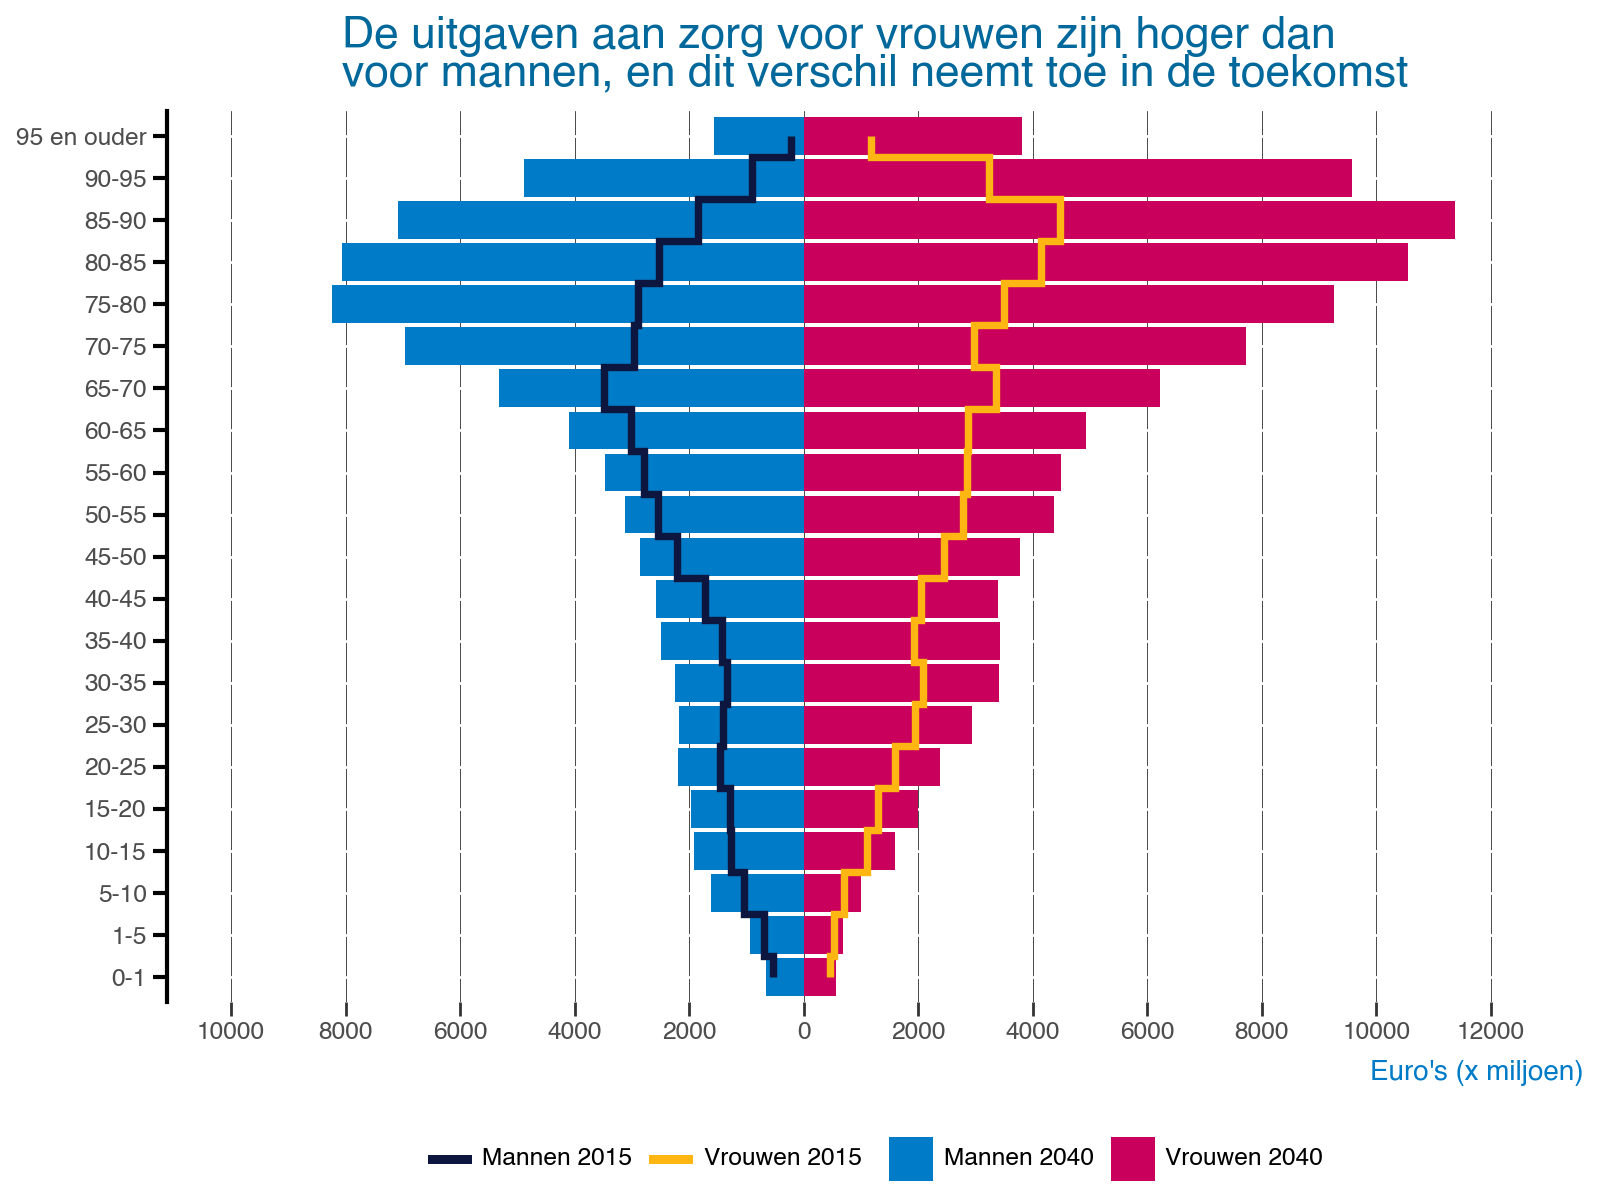

In [5]:
# plot data
p = (
    ggplot() +

    geom_bar(
        data=df.filter(pl.col('variable').is_in(['Mannen 2040', 'Vrouwen 2040'])),
        mapping=aes(x = 'Category', y = 'value', fill = 'variable'),
        stat='identity'
    ) +
    scale_fill_manual(values = ['#007BC7', '#CA005D'], guide=guide_legend(order=1)) +
    
    geom_step(
        data=df.filter(pl.col('variable').is_in(['Mannen 2015', 'Vrouwen 2015'])),
        mapping=aes(x = 'Category', y = 'value', color = 'variable', group = 'variable'),
        stat='identity',
        size = 1.5,
        direction = "mid"
    ) +
    scale_color_manual(values = ['#0C163F', '#FFB612']) +

    scale_x_discrete(limits = data["Category"]) + # use ordered categories from csv
    scale_y_continuous(
        name = "Euro's (x miljoen)",
        limits = [-10_000, 12_500],
        breaks = range(-10_000, 12_500, 2_000),
        labels = list(map(abs, range(-10_000, 12_500, 2_000)))
    ) +
    
    coord_flip() +

    theme(
        figure_size = (8, 6),

        plot_title = element_text(color = "#01689B", size = 16, hjust = 0.5),
        
        legend_position = "bottom",
        legend_title = element_blank(),
        legend_key = element_blank(),
        
        panel_background = element_rect(fill = "white"),
        panel_grid_major_x = element_line(colour = "black", size = 0.25),

        axis_ticks_length = 5,
        axis_ticks_y = element_line(color = "black", size = 1.5),
        axis_line_y = element_line(color = "black", size = 1.5, linetype = "solid"),
        axis_title_y = element_blank(),

        axis_title_x = element_text(colour = "#007BC7", size = 10, hjust = 1)
    ) +

    guides(
        color = guide_legend(order=1),  # 2015 lines
        fill = guide_legend(order=2)    # 2040 bars
    ) +

    ggtitle("De uitgaven aan zorg voor vrouwen zijn hoger dan\nvoor mannen, en dit verschil neemt toe in de toekomst")
    
)
p

In [6]:
# save plot
p.save("zorguitgaven.jpg", width=12, height=8, dpi=100)